In this ML project we have to predict the number of rings of abalone.The given dataset consist of 
categeorical and numerical data. so we have to predict the rings i.e age of the abalone based on the features given

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')



In [90]:
df=pd.read_csv(r'C:\Users\polasasuresh\pythonfiles\abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [91]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

the dataset contains no null values

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 277.4+ KB


in the given dataset allthe variables as of type float and output variable of type int and sex is of object type

In [93]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


as the count says there are no missing values and it describes that mean,std ,min,max of all features and the quartiles of all the features

# EDA

In [94]:
df[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


height of the abalone is 0 it is not possible. so we remove these two rows

In [95]:
df.drop(index=[1257,3996],inplace=True)
df.shape

(4175, 9)

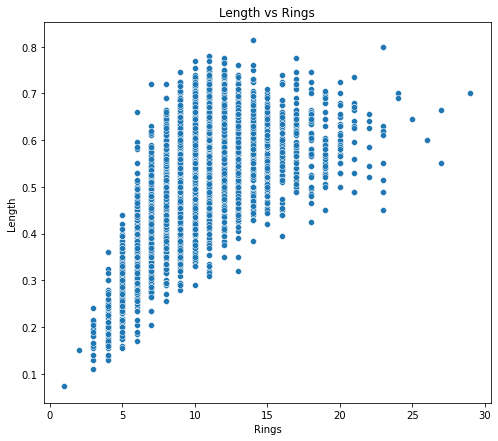

In [96]:
plt.figure(figsize=(8,7))
sns.scatterplot(df['Rings'],df['Length'])
plt.xlabel('Rings')
plt.ylabel('Length')
plt.title('Length vs Rings')
plt.show()

As length increasing rings on the abalone is also increasing

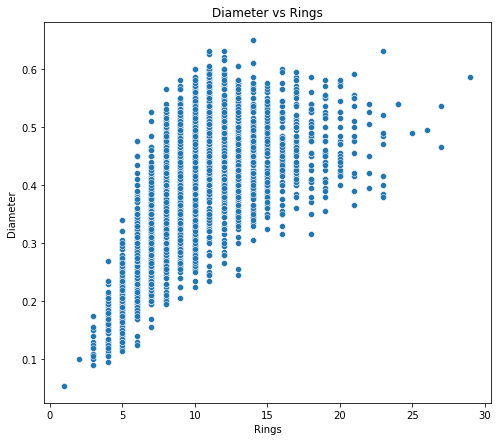

In [97]:
plt.figure(figsize=(8,7))
sns.scatterplot(df['Rings'],df['Diameter'])
plt.xlabel('Rings')
plt.ylabel('Diameter')
plt.title('Diameter vs Rings')
plt.show()

As Diameter is increasing Rings is also increasing

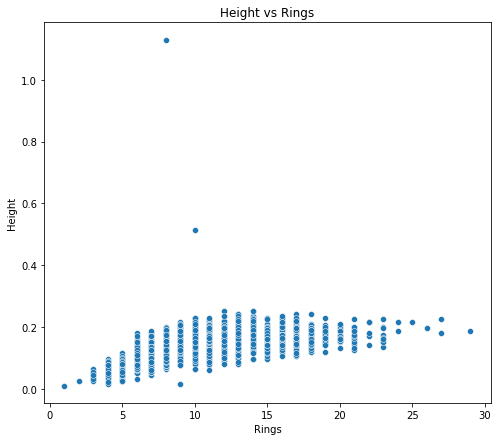

In [98]:
plt.figure(figsize=(8,7))
sns.scatterplot(df['Rings'],df['Height'])
plt.xlabel('Rings')
plt.ylabel('Height')
plt.title('Height vs Rings')
plt.show()

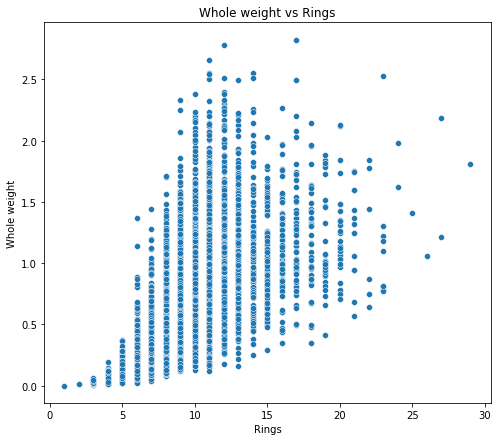

In [99]:
plt.figure(figsize=(8,7))
sns.scatterplot(df['Rings'],df['Whole weight'])
plt.xlabel('Rings')
plt.ylabel('Whole weight')
plt.title('Whole weight vs Rings')
plt.show()

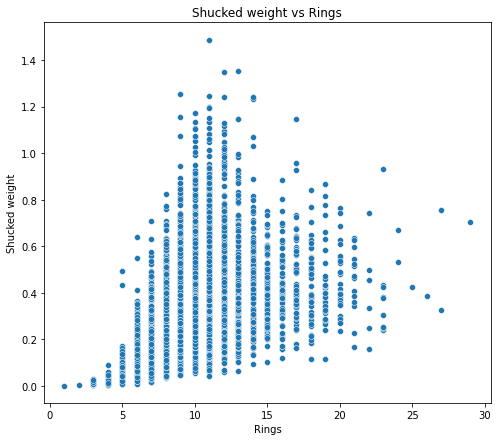

In [100]:
plt.figure(figsize=(8,7))
sns.scatterplot(df['Rings'],df['Shucked weight'])
plt.xlabel('Rings')
plt.ylabel('Shucked weight')
plt.title('Shucked weight vs Rings')
plt.show()

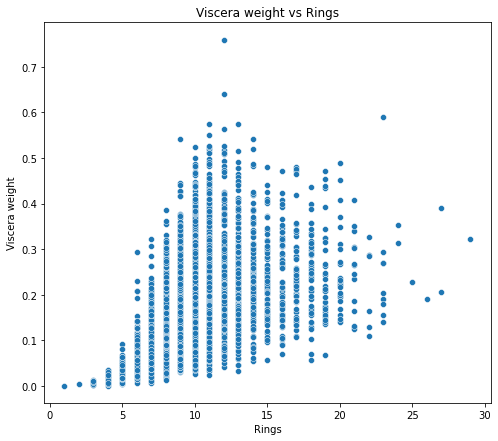

In [101]:
plt.figure(figsize=(8,7))
sns.scatterplot(df['Rings'],df['Viscera weight'])
plt.xlabel('Rings')
plt.ylabel('Viscera weight')
plt.title('Viscera weight vs Rings')
plt.show()

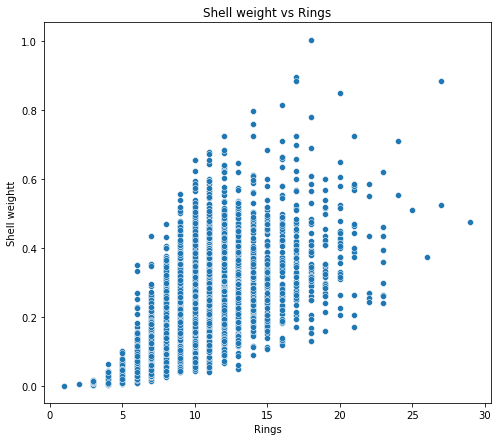

In [102]:
plt.figure(figsize=(8,7))
sns.scatterplot(df['Rings'],df['Shell weight'])
plt.xlabel('Rings')
plt.ylabel('Shell weightt')
plt.title('Shell weight vs Rings')
plt.show()

# Dependent variable

In [103]:
#given that rings+1.5 gives the abalone age
df['Age']=df['Rings']+1.5
df.drop('Rings',axis=1,inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


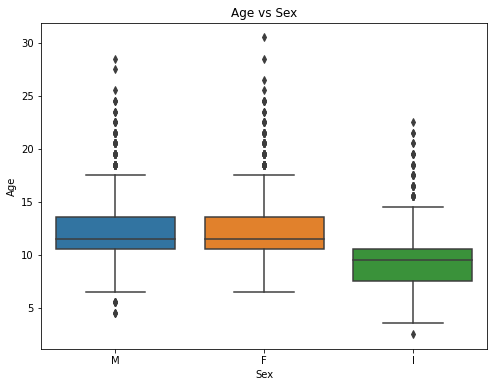

In [104]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex',y='Age',data=df)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age vs Sex')
plt.show()

There is no age for male and female and for infants it lies between 5-10

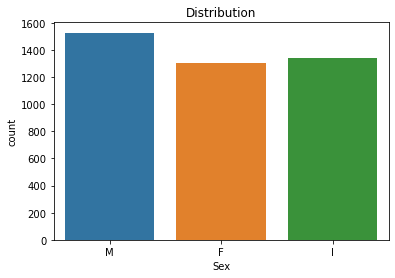

In [105]:
sns.countplot('Sex',data=df)
plt.title("Distribution")
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

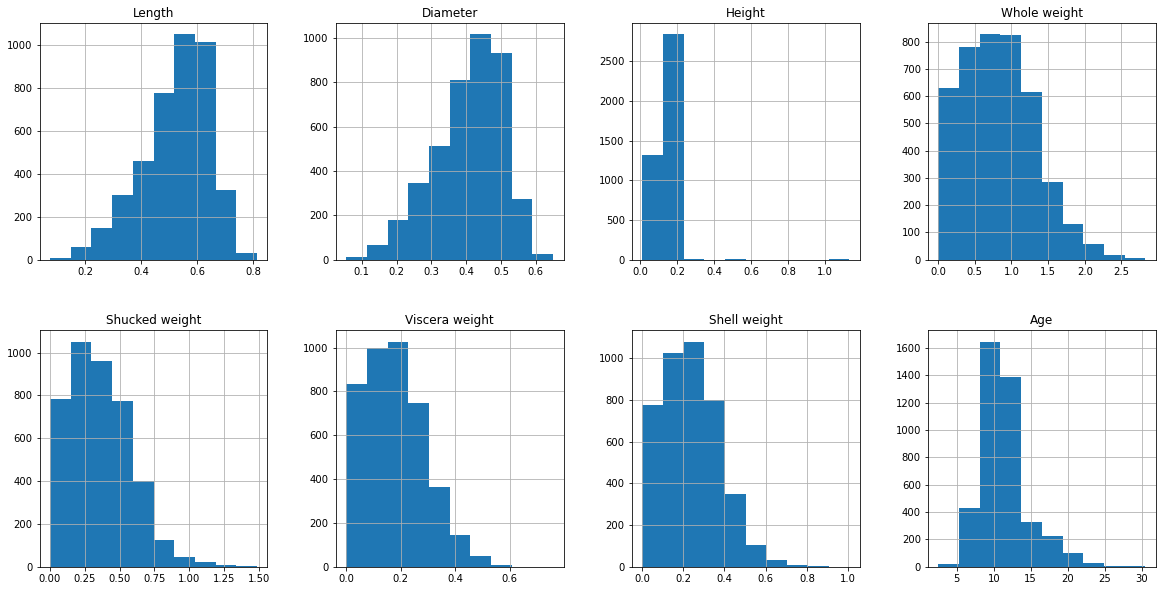

In [106]:
df.hist(figsize=(20,10),layout=(2,4))

skewness of height is too high need to normalise

skewness of variables

In [107]:
df.skew().sort_values(ascending=False)

Height            3.166364
Age               1.113754
Shucked weight    0.718735
Shell weight      0.621081
Viscera weight    0.591455
Whole weight      0.530549
Diameter         -0.610182
Length           -0.640993
dtype: float64

skewness of all the variables are near to 0 and 1 and for height it is 3.16 

# Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

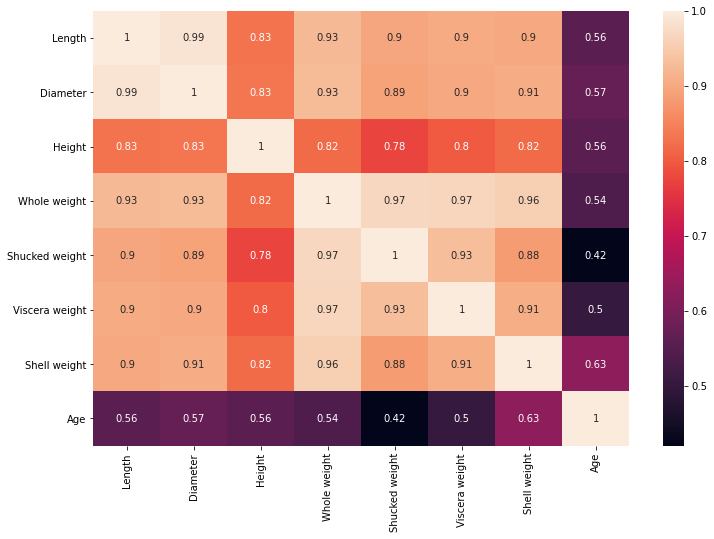

In [108]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.show

no negative correlation is there
high correlation between length and diameter
high correlation between shucked weight,viscera weight vs whole_weight & shell weight vs whole_weight

Length               AxesSubplot(0.125,0.657941;0.168478x0.222059)
Diameter          AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Height            AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Whole weight      AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Shucked weight       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Viscera weight    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Shell weight      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Age               AxesSubplot(0.731522,0.391471;0.168478x0.222059)
dtype: object

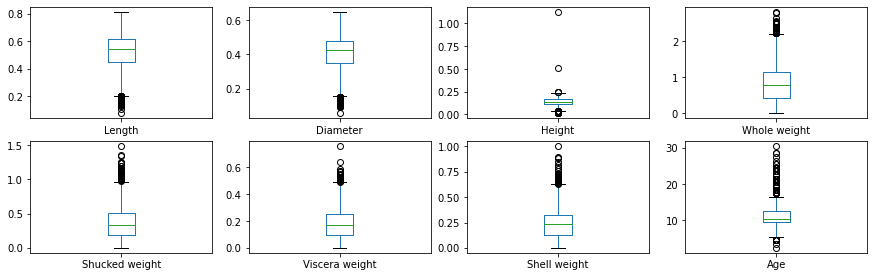

In [109]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,7))

There may be outliers present in Height and Shellweight,viscera weight

In [110]:
up=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
cols_to_drop=[column for column in up.columns if any(up[column]>0.95)] #highly correlated variables to be removed
print("columns to drop",cols_to_drop)

columns to drop ['Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [111]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [112]:
df.head()

,Sex,Length,Height,Whole weight,Age
0,M,0.455,0.095,0.5140,16.5
1,M,0.350,0.090,0.2255,8.5
2,F,0.530,0.135,0.6770,10.5
3,M,0.440,0.125,0.5160,11.5
4,I,0.330,0.080,0.2050,8.5


VIF

In [113]:
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sma.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [114]:
temp=df.drop('Sex',axis=1)#because of categorical
vif_arr(temp).sort_values(by='Features',ascending=False)

,Features,VIF
0,const,62.359271
3,Whole weight,7.425114
1,Length,7.833655
2,Height,3.532659
4,Age,1.515261


Length             AxesSubplot(0.125,0.657941;0.168478x0.222059)
Height          AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Whole weight    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Age             AxesSubplot(0.731522,0.657941;0.168478x0.222059)
dtype: object

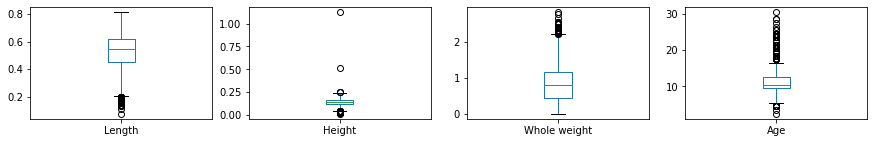

In [115]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,7))

Normalize height

In [116]:
df['Height']=np.sqrt(df['Height'])

In [117]:
df.skew().sort_values(ascending=False)

Age             1.113754
Whole weight    0.530549
Height         -0.176012
Length         -0.640993
dtype: float64

all input variables are close 0

# Model Creation

In [118]:
df.head()

,Sex,Length,Height,Whole weight,Age
0,M,0.455,0.308221,0.5140,16.5
1,M,0.350,0.300000,0.2255,8.5
2,F,0.530,0.367423,0.6770,10.5
3,M,0.440,0.353553,0.5160,11.5
4,I,0.330,0.282843,0.2050,8.5


In [119]:
Age=[]
for i in df["Whole weight"]:
    if i < 0.6:
        Age.append(1)
    elif i>0.6 and i <1.0:
        Age.append(2)
    else:
        Age.append(3)
df["age"]=Age
df.drop('Age',axis=1,inplace=True)
df.head()

,Sex,Length,Height,Whole weight,age
0,M,0.455,0.308221,0.5140,1
1,M,0.350,0.300000,0.2255,1
2,F,0.530,0.367423,0.6770,2
3,M,0.440,0.353553,0.5160,1
4,I,0.330,0.282843,0.2050,1


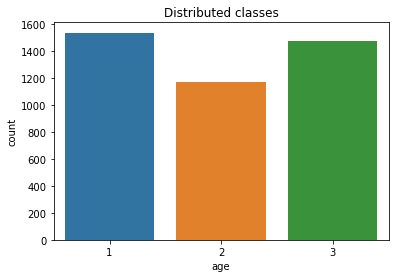

In [120]:
sns.countplot('age',data=df)
plt.title('Distributed classes')

plt.show()

In [121]:
df.skew().sort_values(ascending=False)

Whole weight    0.530549
age             0.027757
Height         -0.176012
Length         -0.640993
dtype: float64

# Changing Categeorical data into numerical

In [122]:
oe=OrdinalEncoder()
list1=['Sex']
for val in list1:
    df[val]=oe.fit_transform(df[val].values.reshape(-1,1))
df

,Sex,Length,Height,Whole weight,age
0,2.0,0.455,0.308221,0.5140,1
1,2.0,0.350,0.300000,0.2255,1
2,0.0,0.530,0.367423,0.6770,2
3,2.0,0.440,0.353553,0.5160,1
4,1.0,0.330,0.282843,0.2050,1
...,...,...,...,...,...
4172,0.0,0.565,0.406202,0.8870,2
4173,2.0,0.590,0.367423,0.9660,2
4174,2.0,0.600,0.452769,1.1760,3
4175,0.0,0.625,0.387298,1.0945,3


splitting the cells into train test split 70% of data go for train 30% of datawill go for test

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [146]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=3)
kn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [147]:
test_preds = knn_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.06318240236065635

RMSE measures the average error of the predicted age for training is 1.66 and predictive performances on the test set is 2.399. 

In [148]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [149]:
gridsearch.best_params_
train_preds_grid = gridsearch.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

0.05606881998803166

In [150]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.05881961554041324

In [151]:
test_rmse

0.09477360354098452

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

classifiers={"LogisticRegression":LogisticRegression(),
             "KNearest":KNeighborsClassifier(),
             "Support Vector classifier":SVC(),
             "DecisionTreeClassifier":DecisionTreeClassifier(),  
             "RandomForestClassifier":RandomForestClassifier()
            }

for key,classifier in classifiers.items():
    classifier.fit(x_train_scaled,y_train)
    training_score=cross_val_score(classifier,x_train_scaled,y_train,cv=5)
    print("Classifiers",classifier.__class__.__name__,"has a training score of",round(training_score.mean(),2)*100,"%accuracy score")
    

Classifiers LogisticRegression has a training score of 98.0 %accuracy score
Classifiers KNeighborsClassifier has a training score of 97.0 %accuracy score
Classifiers SVC has a training score of 98.0 %accuracy score
Classifiers DecisionTreeClassifier has a training score of 100.0 %accuracy score
Classifiers RandomForestClassifier has a training score of 100.0 %accuracy score


# DecisionTreeClassifier

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
dtc=DecisionTreeClassifier()
dtc.fit(x_train_scaled,y_train)
dtc.score(x_train_scaled,y_train)
preddtc=dtc.predict(x_test_scaled)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))




1.0
[[305   0   0]
 [  0 238   0]
 [  0   0 292]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       305
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       292

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835



we are getting model accuracy score and cross validation score as  100% with DecisionTreeClassifier.which shows model is performing well.

# RandomForest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
rf=RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
rf.score(x_train_scaled,y_train)
preddtc=rf.predict(x_test_scaled)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[305   0   0]
 [  0 238   0]
 [  0   0 292]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       305
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       292

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835



we are getting model accuracy score and cross validation score as  100% with RandomForestClassifier.which shows model is performing well.

# KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
knn=KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
knn.score(x_train_scaled,y_train)
preddtc=knn.predict(x_test_scaled)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.9616766467065868
[[296   9   0]
 [ 10 222   6]
 [  0   7 285]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       305
           2       0.93      0.93      0.93       238
           3       0.98      0.98      0.98       292

    accuracy                           0.96       835
   macro avg       0.96      0.96      0.96       835
weighted avg       0.96      0.96      0.96       835



we are getting accuracy score as 96 

# saving the model

In [159]:
import pickle
filename='pickledtfile.pkl'
pickle.dump(dtc,open(filename,'wb'))